# Germany vs EU: A Data-Driven Analysis of Energy Consumption Trends (1990–2023)

##  1. Introduction
This notebook explores and compares the energy consumption patterns and renewable transition trends of Germany and the European Union from 1990 to 2023.

##  2. Load the Raw Datasets
We have used two main datasets from Eurostat:
- **`nrg_bal_c`**: Energy consumption by fuel type (1990–2023), covering Germany and EU-27.
- **`nrg_ind_ren`**: Share of energy from renewables (% of gross final consumption), available from 2004–2023.

These datasets form the basis of all visualisations and comparisons in this analysis.


In [1]:
# Load Libraries and Datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For cleaner plots
plt.style.use("seaborn-v0_8-whitegrid")

# Load Energy Consumption Dataset (Dataset: nrg_bal_c)
df_energy = pd.read_csv("../data/estat_nrg_bal_c_filtered_en.csv")

# Load Renewables Share Dataset (Dataset: nrg_ind_share)
df_renew_share = pd.read_csv("../data/nrg_ind_ren_eu_vs_de_2_0.csv")

# Preview
print("Energy Dataset:")
display(df_energy.head(3))
print("Renewables Share Dataset:")
display(df_renew_share.head(3))


Energy Dataset:


,DATAFLOW,LAST UPDATE,freq,nrg_bal,siec,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG,CONF_STATUS
0,ESTAT:NRG_BAL_C(1.0),02/05/25 23:00:00,Annual,Gross inland consumption,Bioenergy,Thousand tonnes of oil equivalent,Albania,1990,363.022,NaN,NaN
1,ESTAT:NRG_BAL_C(1.0),02/05/25 23:00:00,Annual,Gross inland consumption,Bioenergy,Thousand tonnes of oil equivalent,Albania,1991,363.022,NaN,NaN
2,ESTAT:NRG_BAL_C(1.0),02/05/25 23:00:00,Annual,Gross inland consumption,Bioenergy,Thousand tonnes of oil equivalent,Albania,1992,363.022,NaN,NaN


Renewables Share Dataset:


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,freq,Time frequency,nrg_bal,Energy balance,unit,Unit of measure,geo,Geopolitical entity (reporting),TIME_PERIOD,Time,OBS_VALUE,Observation value,OBS_FLAG,Observation status (Flag) V2 structure,CONF_STATUS,Confidentiality status (flag)
0,dataflow,ESTAT:NRG_IND_REN(1.0),Share of energy from renewable sources,A,Annual,REN,Renewable energy sources,PC,Percentage,DE,Germany,2004,NaN,6.207,NaN,NaN,NaN,NaN,NaN
1,dataflow,ESTAT:NRG_IND_REN(1.0),Share of energy from renewable sources,A,Annual,REN,Renewable energy sources,PC,Percentage,DE,Germany,2005,NaN,7.167,NaN,NaN,NaN,NaN,NaN
2,dataflow,ESTAT:NRG_IND_REN(1.0),Share of energy from renewable sources,A,Annual,REN,Renewable energy sources,PC,Percentage,DE,Germany,2006,NaN,8.466,NaN,NaN,NaN,NaN,NaN


##  3. Filter for Relevant Countries & Columns
We have a filtered dataset for Germany and the EU-27, and keep key fuel types.

In [2]:
# Filter Relevant Data (Germany + EU)  

# Select relevant columns
df_filtered = df_energy[['TIME_PERIOD', 'geo', 'siec', 'OBS_VALUE']]
df_filtered.head()

# Split into Germany and the EU
germany_df = df_filtered[df_filtered['geo'] == "Germany"]
eu_df = df_filtered[df_filtered['geo'] == "European Union - 27 countries (from 2020)"]

# Save for reuse
germany_df.to_csv("../data/germany_energy.csv", index=False)
eu_df.to_csv("../data/eu_energy.csv", index=False)


In [3]:
# Step: Filter & Clean Renewables Share Dataset: nrg_ind_ren_eu_vs_de_2_0 (Germany vs EU)

# Filter only Germany and the EU
renew_share_filtered = df_renew_share[df_renew_share['Geopolitical entity (reporting)'].isin(['Germany', 'European Union - 27 countries (from 2020)'])]

# Select and Rename columns
renew_share_filtered = renew_share_filtered[['TIME_PERIOD', 'Geopolitical entity (reporting)', 'OBS_VALUE']].rename(columns={
    'TIME_PERIOD': 'Year',
    'Geopolitical entity (reporting)': 'Region',
    'OBS_VALUE': 'Renewables Share (%)'
})

# Sort for neatness
renew_share_filtered = renew_share_filtered.sort_values(by=['Region', 'Year'])

# Preview -> just for 5 rows
renew_share_filtered.head(5)


,Year,Region,Renewables Share (%)
20,2004,European Union - 27 countries (from 2020),9.605
21,2005,European Union - 27 countries (from 2020),10.182
22,2006,European Union - 27 countries (from 2020),10.778
23,2007,European Union - 27 countries (from 2020),11.749
24,2008,European Union - 27 countries (from 2020),12.552


##  4. Pivot the Data: Fuel Types as Columns
Reshape the data for plotting (TIME_PERIOD as index, fuel types as columns).

In [4]:
# Pivot both datasets
germany_pivot = germany_df.pivot(index='TIME_PERIOD', columns='siec', values='OBS_VALUE').reset_index()
eu_pivot = eu_df.pivot(index='TIME_PERIOD', columns='siec', values='OBS_VALUE').reset_index()
germany_pivot.columns
eu_pivot.columns


Index(['TIME_PERIOD', 'Bioenergy', 'Charcoal', 'Crude oil', 'Electricity',
       'Fossil energy', 'Geothermal', 'Heat', 'Hydro', 'Lignite',
       'Natural gas', 'Natural gas liquids', 'Nuclear heat',
       'Oil and petroleum products (excluding biofuel portion)', 'Peat',
       'Primary solid biofuels', 'Renewables and biofuels', 'Solar thermal',
       'Solid fossil fuels', 'Tide, wave, ocean', 'Wind'],
      dtype='object', name='siec')

## 5. Export Processed Data for Reuse

In [5]:

# Save pivoted data for reuse
germany_pivot.to_csv("../data/germany_energy.csv", index=False)
eu_pivot.to_csv("../data/eu_energy.csv", index=False)


## 6. Fuel-wise Comparison – Germany vs EU

### 6.1 Bioenergy vs Solid Fossil Fuels (Germany vs EU)
**Insights:**
Germany has made a significant shift from solid fossil fuels (like coal and lignite) toward bioenergy, especially after the early 2000s. Solid fossil fuel consumption has declined sharply, while bioenergy steadily increased, indicating a clear renewable transition.

The EU average, although showing a decline in solid fossil fuel usage, has done so at a slower pace than Germany. Bioenergy growth in the EU is evident but less aggressive compared to Germany.

Germany’s trajectory reflects stronger national policies (e.g., Energiewende) focused on coal phase-out and encouraging biomass and biogas usage.
This contrast highlights Germany’s early commitment to replace coal with bio-based alternatives, which preceded many of its EU competitors.

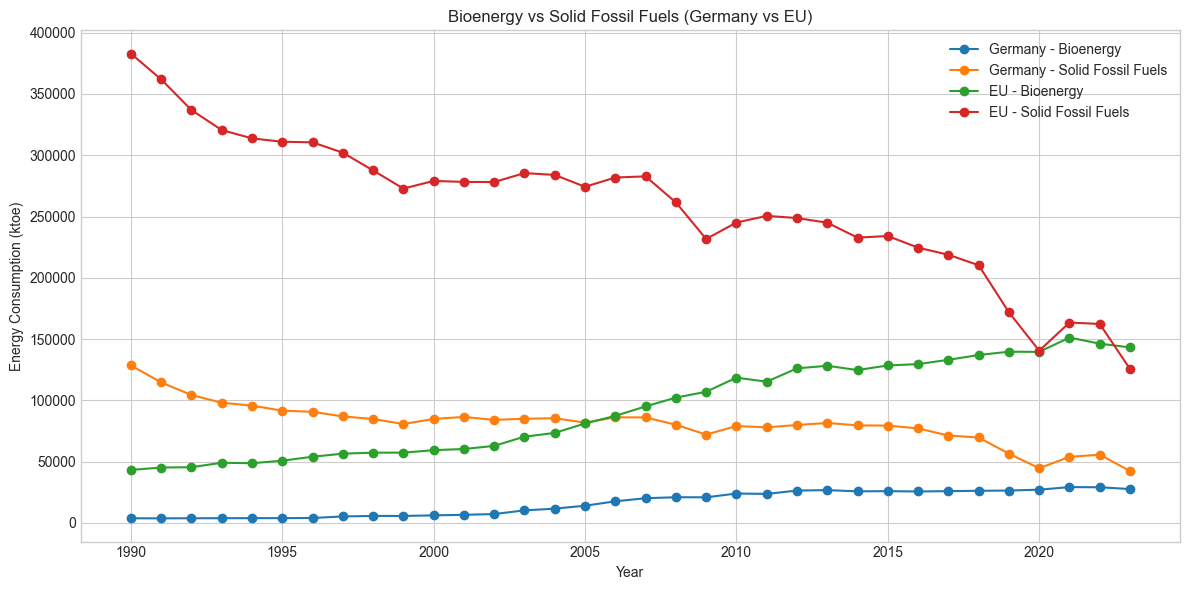

In [6]:
#Germany vs EU - Bioenergy vs Solid Fossil Fuels  
plt.figure(figsize=(12, 6))
plt.plot(germany_pivot['TIME_PERIOD'], germany_pivot['Bioenergy'], label='Germany - Bioenergy', marker='o')
plt.plot(germany_pivot['TIME_PERIOD'], germany_pivot['Solid fossil fuels'], label='Germany - Solid Fossil Fuels', marker='o')
plt.plot(eu_pivot['TIME_PERIOD'], eu_pivot['Bioenergy'], label='EU - Bioenergy', marker='o')
plt.plot(eu_pivot['TIME_PERIOD'], eu_pivot['Solid fossil fuels'], label='EU - Solid Fossil Fuels', marker='o')

plt.title('Bioenergy vs Solid Fossil Fuels (Germany vs EU)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (ktoe)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../visuals/bio_vs_fossil.png")
plt.show()
 

# 6.2 Germany vs EU - Natural Gas Consumption (1990–2023)
**Insights:**
Both Germany and the EU saw an upward trend in natural gas consumption from the early 1990s until around 2005–2010, reflecting a broader shift from coal to cleaner-burning fuels.

Germany's consumption remained relatively consistent, peaking around 2010, but showed a notable drop after 2020, most likely due to the Russia-Ukraine crisis (2022) and growing concerns about energy security. In contrast, the EU average has declined since 2010, albeit less dramatically than Germany, with occasional swings depending on member state policy and gas supply contracts.

Germany's steeper decline after 2020 may reflect speedier adaptation, emergency measures to reduce Russian imports, and a greater emphasis on energy diversification.


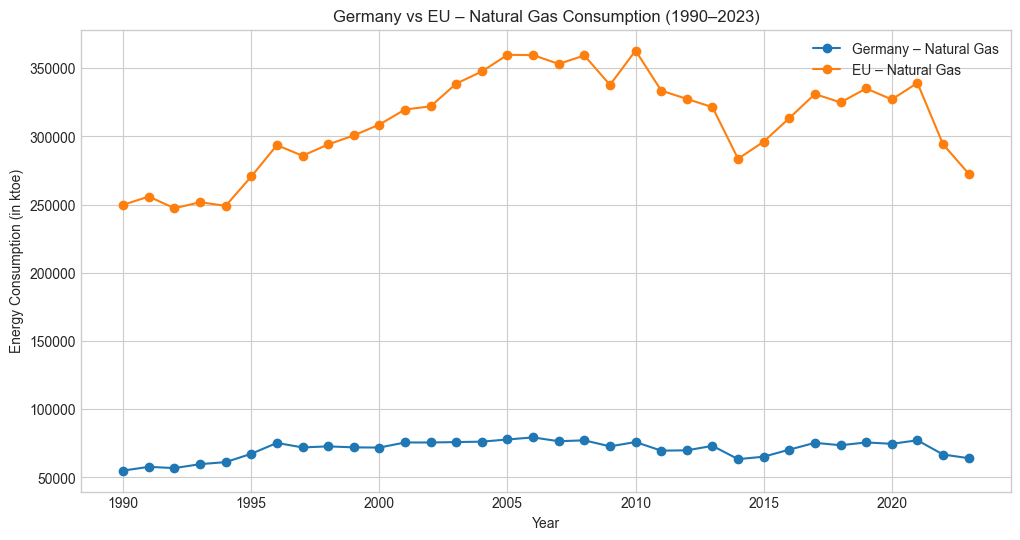

In [7]:
# 📊 Germany vs EU – Natural Gas Consumption (1990–2023)

plt.figure(figsize=(12, 6))
plt.plot(germany_pivot['TIME_PERIOD'], germany_pivot['Natural gas'], label='Germany – Natural Gas', marker='o')
plt.plot(eu_pivot['TIME_PERIOD'], eu_pivot['Natural gas'], label='EU – Natural Gas', marker='o')

plt.title('Germany vs EU – Natural Gas Consumption (1990–2023)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (in ktoe)')
plt.legend()
plt.grid(True)

# Save the visual
plt.savefig('../visuals/germany_vs_eu_natural_gas.png', bbox_inches='tight')
plt.show()


### 6.3 Germany vs EU - Oil & Petroleum Products Consumption (1990-2023) 
**Insights:** Oil remains a dominant energy source for both Germany and the EU, with relatively stable consumption patterns from 1990 to 2023.
While minor fluctuations have occurred in response to global events (for example, the 2008 financial crisis and the 2020 pandemic), the overall trend shows no significant long-term decline.

Germany's oil consumption mirrors the EU trend, but it remains continuously lower in absolute terms, reflecting its increased industrial efficiency and shift toward electrification in some sectors. Despite the push for renewables, the persistent reliance on oil raises concerns about decarbonizing transportation and key industrial operations.

This also highlights a critical policy gap: while renewable energy is increasing, oil consumption remains stubbornly high, implying that the transition in this sector is still ongoing.

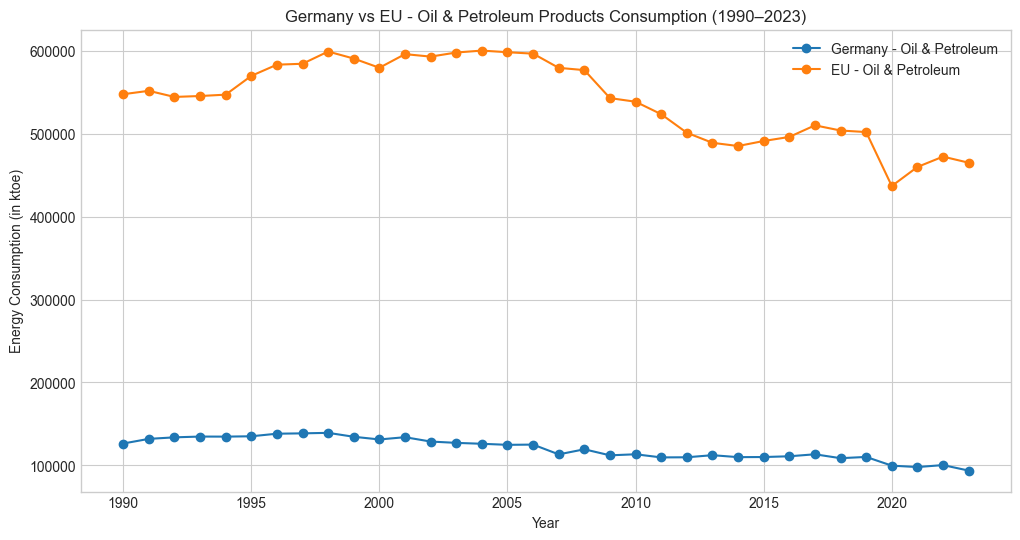

In [8]:
# Germany vs EU - Oil & Petroleum Products Consumption (1990-2023)

plt.figure(figsize=(12, 6))
plt.plot(germany_pivot['TIME_PERIOD'], germany_pivot['Oil and petroleum products (excluding biofuel portion)'], label='Germany - Oil & Petroleum', marker='o')
plt.plot(eu_pivot['TIME_PERIOD'], eu_pivot['Oil and petroleum products (excluding biofuel portion)'], label='EU - Oil & Petroleum', marker='o')

plt.title('Germany vs EU - Oil & Petroleum Products Consumption (1990–2023)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (in ktoe)')
plt.legend()
plt.grid(True)

# Save visual
plt.savefig('../visuals/germany_vs_eu_oil_petroleum.png', bbox_inches='tight')
plt.show()


### 6.4 Wind Energy Consumption (Germany vs EU)
**Insights:** Germany emerged as a pioneer in wind energy across the EU, showing a steeper and earlier growth trajectory starting from the late 1990s. The EU average followed suit, but at a slower rate, demonstrating that several EU countries began expanding wind capacity following Germany's early lead.

The growth in Germany aligns with major policy interventions such as the Renewable Energy Sources Act (EEG) introduced in 2000, which offered feed-in tariffs and investment incentives. By 2023, Germany maintains a significant lead in absolute wind energy consumption, reinforcing its position as a frontrunner in large-scale renewable adoption. This trend also reflects Germany’s favourable wind geography, particularly in the north (offshore and coastal zones), and consistent long-term planning.

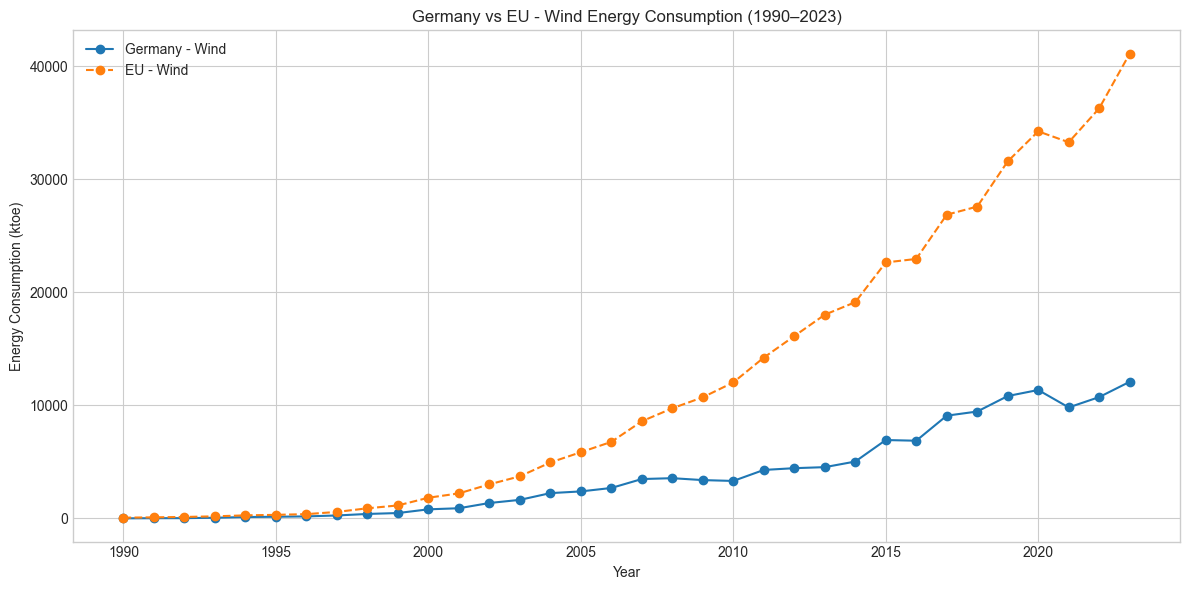

In [9]:
# Germany vs EU - Wind Energy Comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(germany_pivot['TIME_PERIOD'], germany_pivot['Wind'], marker='o', label='Germany - Wind')
plt.plot(eu_pivot['TIME_PERIOD'], eu_pivot['Wind'], marker='o', linestyle='--', label='EU - Wind')

plt.title("Germany vs EU - Wind Energy Consumption (1990–2023)")
plt.xlabel("Year")
plt.ylabel("Energy Consumption (ktoe)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../visuals/germany_vs_eu_wind.png")
plt.show()


### 6.5 Hydro Energy Consumption (Germany vs EU)
**Insights:** Hydropower usage in Germany remained remarkably stable over three decades, indicating that the majority of feasible hydro capacity had been constructed by the 1990s. The EU average shows higher absolute consumption, driven mostly by hydro-rich countries such as Sweden, France, Austria, and Norway (EFTA). This highlights Germany's geographic constraints in hydroelectric development, as the country has fewer alpine areas and fewer large river systems than other EU countries.

Germany’s flat hydro trend underscores why it had to aggressively expand wind and solar to compensate for its limited hydro potential. Overall, this contrast reflects the varying renewable portfolios among EU nations, which are influenced by location and natural resource availability.


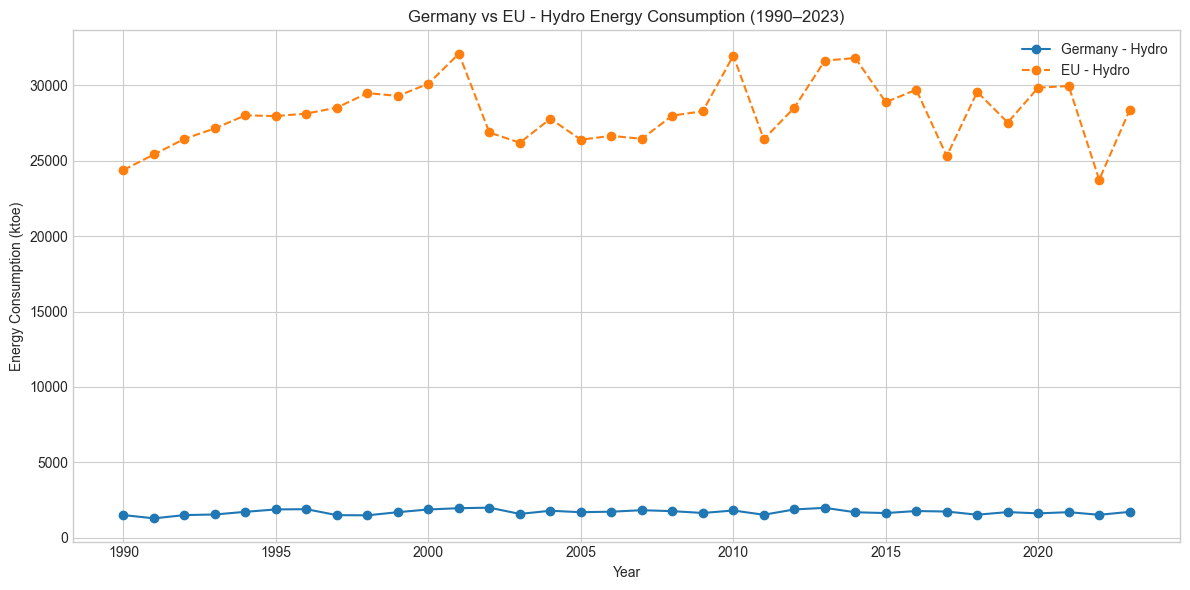

In [10]:
# Germany vs EU - Hydro Energy Comparison
plt.figure(figsize=(12,6))

plt.plot(germany_pivot['TIME_PERIOD'], germany_pivot['Hydro'], marker='o', label='Germany - Hydro')
plt.plot(eu_pivot['TIME_PERIOD'], eu_pivot['Hydro'], marker='o', linestyle='--', label='EU - Hydro')

plt.title("Germany vs EU - Hydro Energy Consumption (1990–2023)")
plt.xlabel("Year")
plt.ylabel("Energy Consumption (ktoe)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../visuals/germany_vs_eu_hydro.png")
plt.show()


### 6.6 Solar Thermal Energy (Germany vs EU)
**Insights:** Germany saw a consistent increase in solar thermal energy consumption, particularly after 2000, showing major policy support and public acceptance of solar technologies for water and space heating. The EU average remained comparably lower and flatter, indicating that Germany was a pioneer and leader in this section within Europe.

Key reasons behind Germany’s growth include:
- Subsidies and tax incentives for solar thermal systems,
- Public awareness campaigns around energy efficiency,
- Strong domestic manufacturing and innovation in solar tech.

However, solar thermal remains a modest proportion of overall energy consumption in both Germany and the EU, demonstrating that its function is more supporting than central. This highlights Germany's proactive commitment to diversifying its renewable energy mix, including smaller-scale technology.

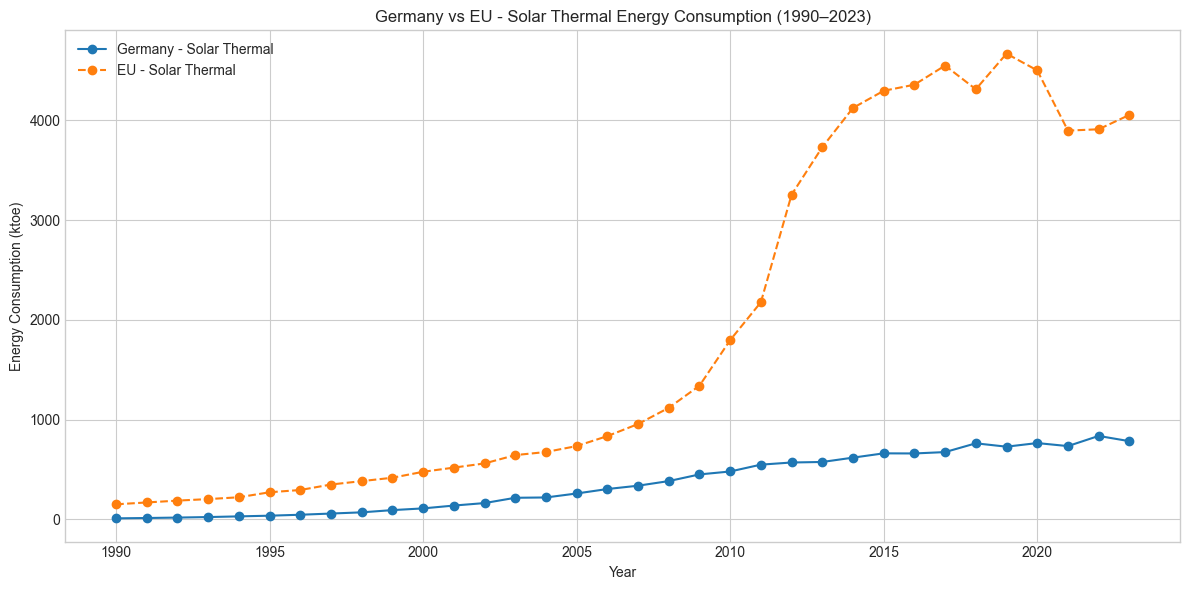

In [11]:
# Germany vs EU - Solar Thermal Energy Comparison
plt.figure(figsize=(12,6))

plt.plot(germany_pivot['TIME_PERIOD'], germany_pivot['Solar thermal'], marker='o', label='Germany - Solar Thermal')
plt.plot(eu_pivot['TIME_PERIOD'], eu_pivot['Solar thermal'], marker='o', linestyle='--', label='EU - Solar Thermal')

plt.title("Germany vs EU - Solar Thermal Energy Consumption (1990–2023)")
plt.xlabel("Year")
plt.ylabel("Energy Consumption (ktoe)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../visuals/germany_vs_eu_solar_thermal.png")
plt.show()


### 6.7 Germany vs EU - Nuclear Heat Consumption (1990-2023)
**Insights:** Germany’s nuclear energy consumption shows a steady and deliberate decline, especially after 2011, following the Fukushima disaster, which led to a major policy shift. The EU average remains relatively stable, reflecting that many EU countries continued or expanded their use of nuclear energy even as Germany phased it out.

Germany's nuclear withdrawal (Atomausstieg) began in 2000, but intensified after 2011. By 2023, Germany had completely shut down all nuclear power plants. This divergence illustrates a key point of contrast in energy policy:
- The EU pursued a balanced energy mix including nuclear,
- Germany chose to prioritise renewables and fossil alternatives despite challenges.

**Impact:** While Germany’s decision aligns with sustainability and safety concerns, it also led to increased short-term dependence on fossil fuels (e.g., natural gas) during the transition years.

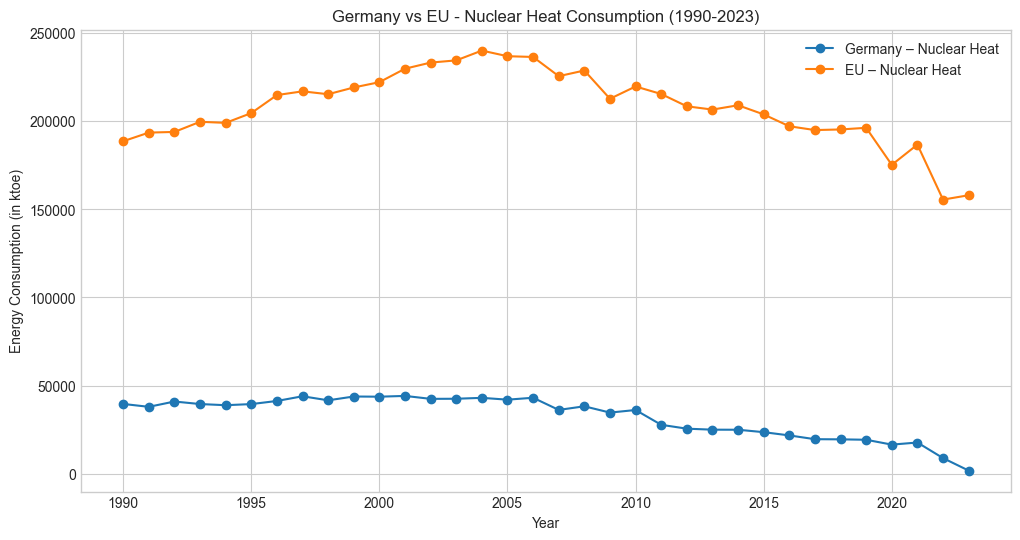

In [12]:
# Germany vs EU - Nuclear Heat Consumption (1990-2023)

plt.figure(figsize=(12, 6))
plt.plot(germany_pivot['TIME_PERIOD'], germany_pivot['Nuclear heat'], label='Germany – Nuclear Heat', marker='o')
plt.plot(eu_pivot['TIME_PERIOD'], eu_pivot['Nuclear heat'], label='EU – Nuclear Heat', marker='o')
plt.title('Germany vs EU - Nuclear Heat Consumption (1990-2023)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (in ktoe)')
plt.legend()
plt.grid(True)

# Save the visual
plt.savefig('../visuals/germany_vs_eu_nuclear_heat.png', bbox_inches='tight')
plt.show()


### 6.8 Germany vs EU - Total Energy Consumption (1990-2023)
**Insights:** Germany's total consumption of energy declined by more than 20% between 1990 and 2023, indicating improved energy efficiency, industrial restructuring, and potentially demographic stabilisation. In contrast, the EU's overall energy consumption remained relatively flat throughout the same time period, with minor dips and rebounds, notably around 2008 (financial crisis) and 2020 (COVID-19 pandemic).

The gap between Germany and the EU has widened slightly in recent years, highlighting that Germany is consuming less energy per capita or per unit of GDP. This downward trend in Germany lends credence to the story of an intentional shift toward energy conservation, aligned with policies under the Energiewende (Energy Transition). Despite rising renewable use, Germany's overall energy consumption is falling, which is a good indicator for long-term sustainability.

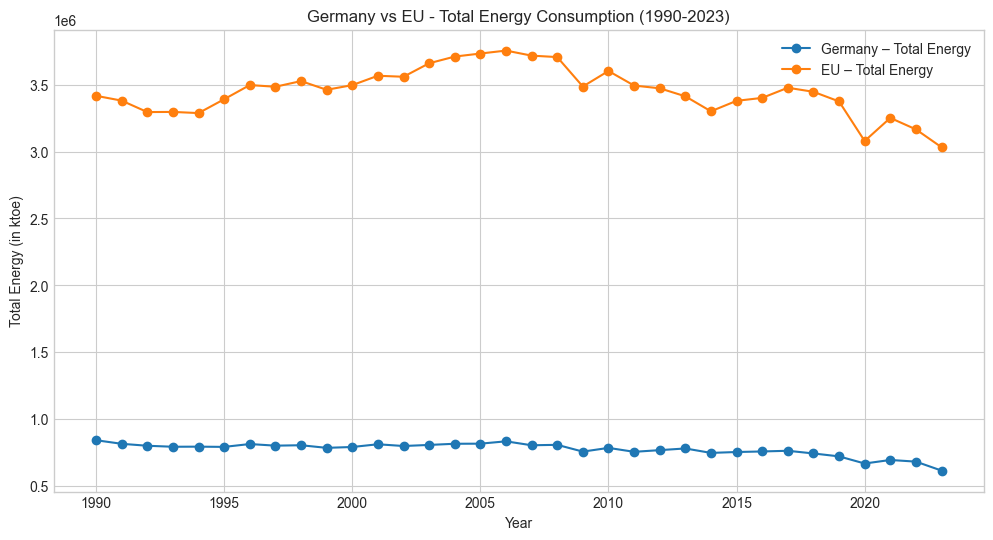

In [13]:
# Germany vs EU - Total Energy Consumption

# Calculate total energy consumption per year (excluding TIME_PERIOD)
germany_total = germany_pivot.copy()
germany_total['Total Energy'] = germany_total.drop(columns='TIME_PERIOD').sum(axis=1)

eu_total = eu_pivot.copy()
eu_total['Total Energy'] = eu_total.drop(columns='TIME_PERIOD').sum(axis=1)

plt.figure(figsize=(12, 6))
plt.plot(germany_total['TIME_PERIOD'], germany_total['Total Energy'], label='Germany – Total Energy', marker='o')
plt.plot(eu_total['TIME_PERIOD'], eu_total['Total Energy'], label='EU – Total Energy', marker='o')

plt.title('Germany vs EU - Total Energy Consumption (1990-2023)')
plt.xlabel('Year')
plt.ylabel('Total Energy (in ktoe)')
plt.legend()
plt.grid(True)

# Save the visual
plt.savefig('../visuals/germany_vs_eu_total_energy.png', bbox_inches='tight')
plt.show()


## 7. Germany - Total Renewable vs Fossil Energy (1990-2023)

**Insights:**
Germany shows a clear and steady decline in fossil fuel consumption since 1990, particularly after 2000, with steeper drops around 2011 (Fukushima incident) and 2022 (Russia–Ukraine crisis). In parallel, renewable energy consumption has increased, particularly since 2010, owing to regulatory incentives such as the Renewable Energy Act (EEG) and increased investment in wind, solar, and biofuels.

While fossil fuels still dominate in total volume, the margin has reduced dramatically during the last three decades. This dual trend, dropping fossil and rising renewables, illustrates Germany's proactive energy transformation, marking it as a leader within the EU.

Although the 2022 energy crisis led to a slight increase in the consumption of fossil fuels (oil and natural gas), the long-term trend is still decreasing.

Notably, despite the nuclear phase-out, Germany was able to meet its energy demands using renewables, showcasing resilience and efficient planning.



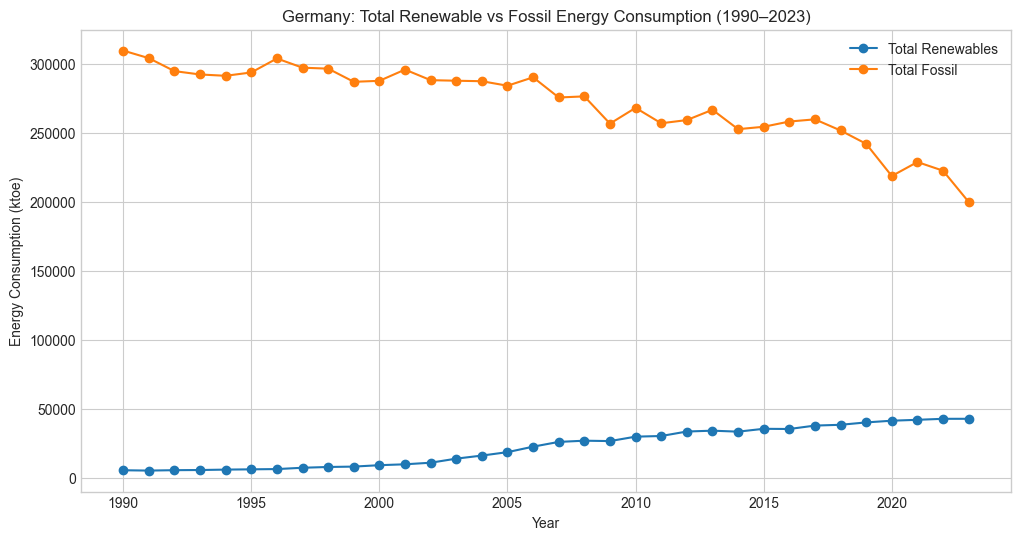

In [14]:
#Germany - Total Renewable vs Fossil Fuels

germany_plot = germany_pivot.copy()

# Add Total Renewable column
germany_plot["Total Renewables"] = ( germany_plot["Bioenergy"] +
    germany_plot["Wind"] +
    germany_plot["Hydro"] +
    germany_plot["Solar thermal"] +
    germany_plot["Geothermal"])

# Add Total Fossil column
germany_plot["Total Fossil"] = ( germany_plot["Solid fossil fuels"] +
    germany_plot["Oil and petroleum products (excluding biofuel portion)"] +
    germany_plot["Natural gas"])

# Plot
germany_plot.set_index("TIME_PERIOD")[["Total Renewables", "Total Fossil"]].plot(figsize=(12, 6), marker='o', title="Germany: Total Renewable vs Fossil Energy Consumption (1990–2023)")
plt.xlabel("Year")
plt.ylabel("Energy Consumption (ktoe)")
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig("../visuals/germany_total_renewable_vs_fossil.png", dpi=300, bbox_inches='tight')
plt.show()


### 7.1 Policy & Crisis Impact on Energy Shift  

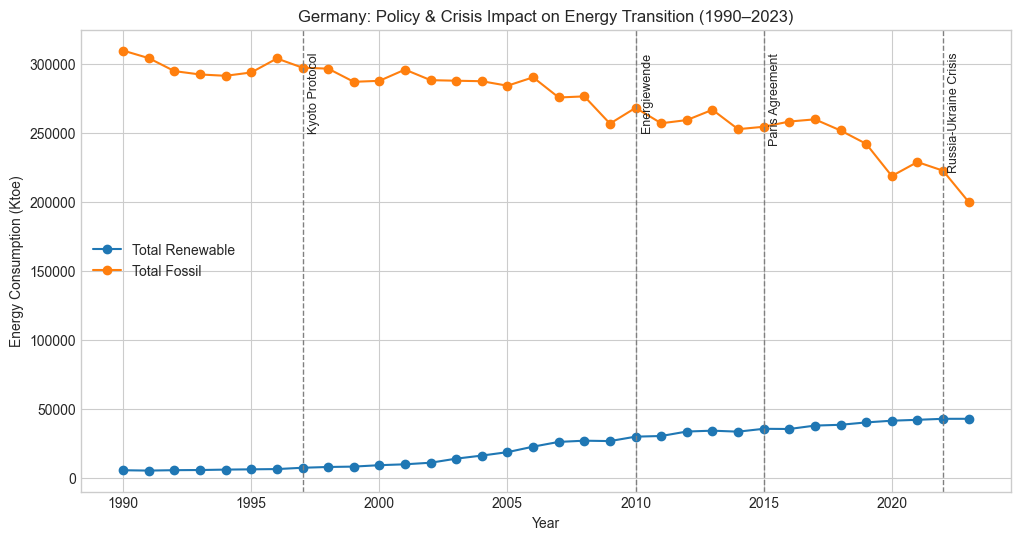

In [15]:
# Create Germany Total Renewable and Fossil DataFrame
germany_renew_fossil = germany_pivot.copy()
germany_renew_fossil['Total Renewable'] = (
    germany_renew_fossil['Bioenergy'] +
    germany_renew_fossil['Wind'] +
    germany_renew_fossil['Hydro'] +
    germany_renew_fossil['Solar thermal'] +
    germany_renew_fossil['Geothermal']
)
germany_renew_fossil['Total Fossil'] = (
    germany_renew_fossil['Solid fossil fuels'] +
    germany_renew_fossil['Natural gas'] +
    germany_renew_fossil['Oil and petroleum products (excluding biofuel portion)']
)


# Plot Germany's Total Renewable vs Fossil with policy annotations
plt.figure(figsize=(12, 6))
plt.plot(germany_renew_fossil['TIME_PERIOD'], germany_renew_fossil['Total Renewable'], label='Total Renewable', marker='o')
plt.plot(germany_renew_fossil['TIME_PERIOD'], germany_renew_fossil['Total Fossil'], label='Total Fossil', marker='o')

# Add policy/event lines
policy_events = { 1997: "Kyoto Protocol", 2010: "Energiewende", 2015: "Paris Agreement", 2022: "Russia-Ukraine Crisis"}
for year, label in policy_events.items():
    plt.axvline(x=year, color='gray', linestyle='--', linewidth=1)
    plt.text(year + 0.2, plt.ylim()[1]*0.95, label, rotation=90, verticalalignment='top', fontsize=9)

plt.title("Germany: Policy & Crisis Impact on Energy Transition (1990–2023)")
plt.xlabel("Year")
plt.ylabel("Energy Consumption (Ktoe)")
plt.legend()
plt.grid(True)

# Save to visuals
plt.savefig("../visuals/germany_policy_impact.png", bbox_inches='tight')
plt.show()


## 8. EU – Total Renewable vs Fossil Energy (1990–2023)

**Insights:** 
The European Union's general trajectory mirrors Germany's, with renewables increasing steadily and fossil fuels declining between 1990 and 2023. However, the EU's fossil fuel utilisation remained relatively stable until around 2005, when observable reductions began, indicating a later but collective acceleration in energy transition.

Renewables have grown consistently, especially from 2010 onward, aligning with EU-wide climate targets and the Paris Agreement (2015). The 2022 energy crisis triggered by the Russia-Ukraine war resulted in a brief increase or delay in fossil reduction, while long-term trends remain consistent.

Unlike Germany, which had strong national programs like Energiewende, the EU’s progress shows variability across member states — with some countries leading and others trailing. Despite this, the EU's overall renewable energy consumption nearly tripled between 1990 and 2023, demonstrating a remarkable collective performance.


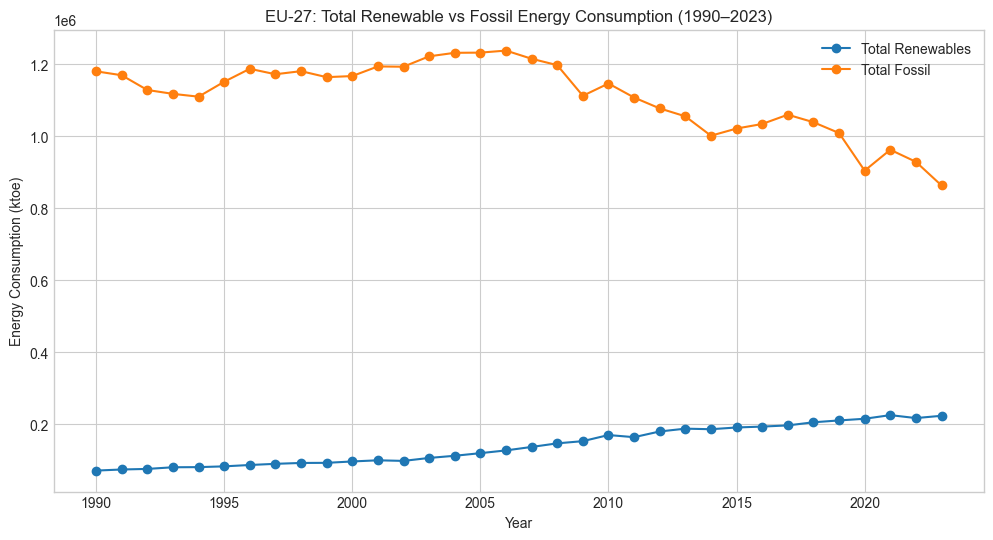

In [16]:
#EU – Total Renewable vs Fossil Fuels

# Make a copy to work with
eu_plot = eu_pivot.copy()

# Add Total Renewable column
eu_plot["Total Renewables"] = (
    eu_plot["Bioenergy"] +
    eu_plot["Wind"] +
    eu_plot["Hydro"] +
    eu_plot["Solar thermal"] +
    eu_plot["Geothermal"]
)

# Add Total Fossil column
eu_plot["Total Fossil"] = (
    eu_plot["Solid fossil fuels"] +
    eu_plot["Oil and petroleum products (excluding biofuel portion)"] +
    eu_plot["Natural gas"]
)

# Plot
eu_plot.set_index("TIME_PERIOD")[["Total Renewables", "Total Fossil"]].plot(
    figsize=(12, 6),
    marker='o',
    title="EU-27: Total Renewable vs Fossil Energy Consumption (1990–2023)"
)

plt.xlabel("Year")
plt.ylabel("Energy Consumption (ktoe)")
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig("../visuals/eu_total_renewable_vs_fossil.png", dpi=300, bbox_inches='tight')
plt.show()


### 8.1 Policy & Crisis Impact on Energy Shift  

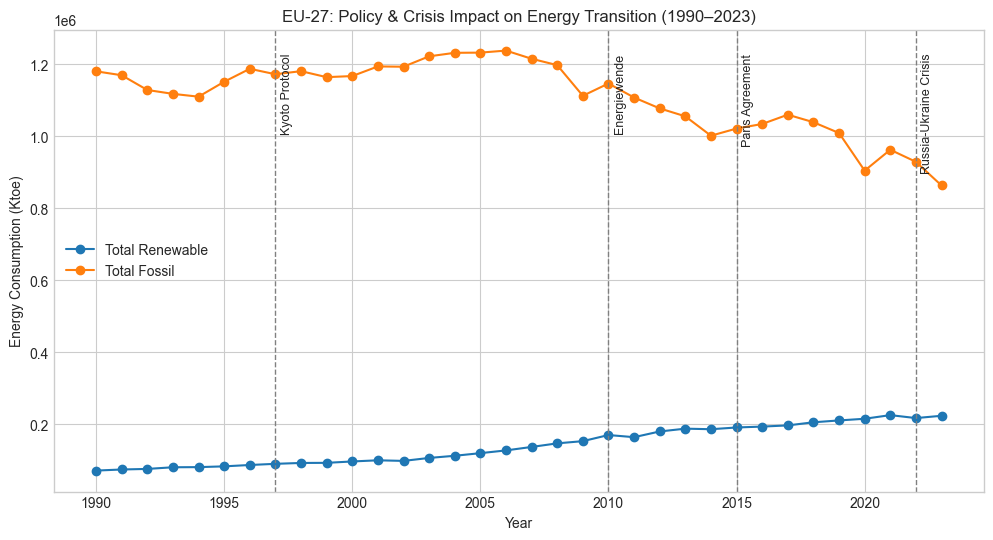

In [17]:
# Create EU Total Renewable and Fossil DataFrame
eu_renew_fossil = eu_pivot.copy()
eu_renew_fossil['Total Renewable'] = (
    eu_renew_fossil['Bioenergy'] +
    eu_renew_fossil['Wind'] +
    eu_renew_fossil['Hydro'] +
    eu_renew_fossil['Solar thermal'] +
    eu_renew_fossil['Geothermal']
)
eu_renew_fossil['Total Fossil'] = (
    eu_renew_fossil['Solid fossil fuels'] +
    eu_renew_fossil['Natural gas'] +
    eu_renew_fossil['Oil and petroleum products (excluding biofuel portion)']
)

# Plot EU's Total Renewable vs Fossil with policy annotations
plt.figure(figsize=(12, 6))

plt.plot(eu_renew_fossil['TIME_PERIOD'], eu_renew_fossil['Total Renewable'], label='Total Renewable', marker='o')
plt.plot(eu_renew_fossil['TIME_PERIOD'], eu_renew_fossil['Total Fossil'], label='Total Fossil', marker='o')

# Reuse the same events
for year, label in policy_events.items():
    plt.axvline(x=year, color='gray', linestyle='--', linewidth=1)
    plt.text(year + 0.2, plt.ylim()[1]*0.95, label, rotation=90, verticalalignment='top', fontsize=9)

plt.title("EU-27: Policy & Crisis Impact on Energy Transition (1990–2023)")
plt.xlabel("Year")
plt.ylabel("Energy Consumption (Ktoe)")
plt.legend()
plt.grid(True)

# Save to visuals/
plt.savefig("../visuals/eu_policy_impact.png", bbox_inches='tight')
plt.show()


## 9. Share of Energy from Renewables (%)

**Insights:** 
In 2004, Germany's renewable energy contribution was just 6.2%, whereas the EU-27 had a greater proportion of 9.6%. Over the years, Germany has shown a more aggressive climb, reaching 22.2% by 2023, compared to 23.0% for the EU. This indicates that Germany has nearly quadrupled its share in less than two decades, catching up with and nearly equaling the EU average, despite starting from a lower base. 

The growth rate was particularly fast after 2010, corresponding with major national and EU-wide initiatives such as Energiewende policies in Germany, and the Paris Agreement (2015). The Russia-Ukraine crisis in 2022 and the latter stages of Germany's nuclear phase-out (2011-2023) may have influenced the renewables share mix, yet Germany stayed on track.

Overall, Germany and the EU are making significant, simultaneous progress in expanding the percentage of renewables, reflecting collaborative efforts and mutual reinforcement of climate goals.



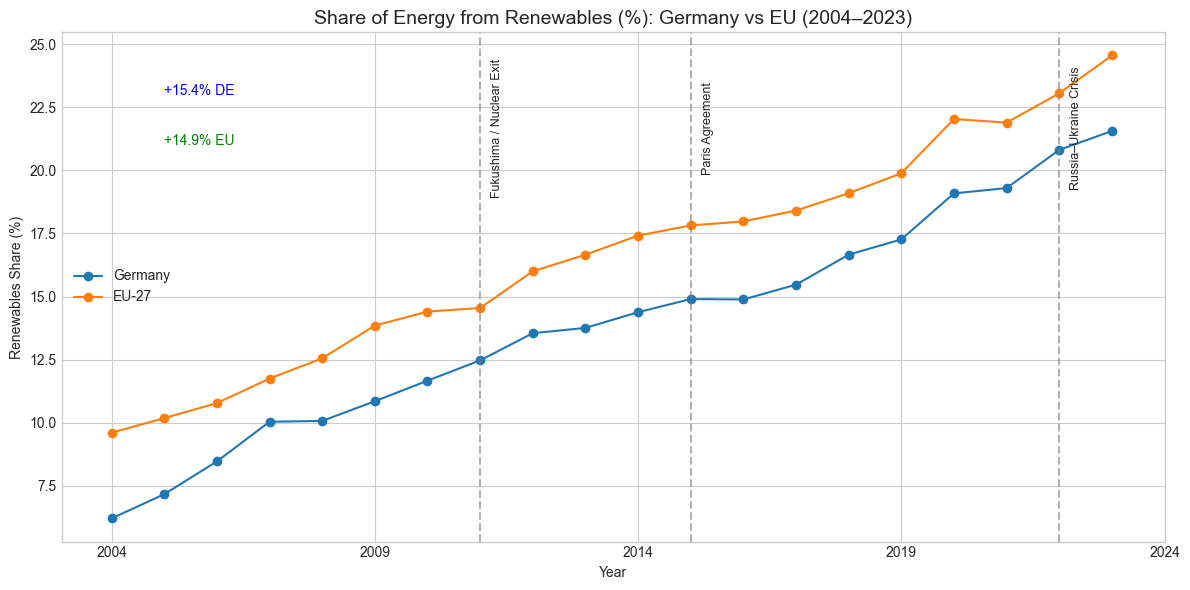

In [18]:
# 📊 Germany vs EU – Share of Energy from Renewables (2004–2023)

plt.figure(figsize=(12, 6))

# Germany
plt.plot(
    renew_share_filtered[renew_share_filtered["Region"] == "Germany"]["Year"],
    renew_share_filtered[renew_share_filtered["Region"] == "Germany"]["Renewables Share (%)"],
    label="Germany", marker='o'
)

# EU-27
plt.plot(
    renew_share_filtered[renew_share_filtered["Region"] == "European Union - 27 countries (from 2020)"]["Year"],
    renew_share_filtered[renew_share_filtered["Region"] == "European Union - 27 countries (from 2020)"]["Renewables Share (%)"],
    label="EU-27", marker='o'
)

plt.title("Share of Energy from Renewables (%): Germany vs EU (2004–2023)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Renewables Share (%)")
plt.grid(True)
plt.legend()

# % increase annotation
y_de = renew_share_filtered[renew_share_filtered["Region"] == "Germany"]["Renewables Share (%)"]
y_eu = renew_share_filtered[renew_share_filtered["Region"] == "European Union - 27 countries (from 2020)"]["Renewables Share (%)"]

plt.text(2005, 23, f"+{(y_de.iloc[-1] - y_de.iloc[0]):.1f}% DE", color='blue')
plt.text(2005, 21, f"+{(y_eu.iloc[-1] - y_eu.iloc[0]):.1f}% EU", color='green')

# Add policy/event annotations
events = {
    2011: "Fukushima / Nuclear Exit",
    2015: "Paris Agreement",
    2022: "Russia–Ukraine Crisis",
}

for year, label in events.items():
    if year in renew_share_filtered["Year"].values:
        plt.axvline(x=year, color='grey', linestyle='--', alpha=0.6)
        plt.text(year + 0.2, plt.ylim()[1]*0.85, label, rotation=90, verticalalignment='center', fontsize=9)

# Save updated visual
plt.xticks(ticks=range(2004, 2024 + 1, 5))
plt.tight_layout()
plt.savefig("../visuals/germany_vs_eu_renewables_share_annotated.png", dpi=300)
plt.show()


### 9.1 Germany vs EU – % Share of Renewables (2004–2023)


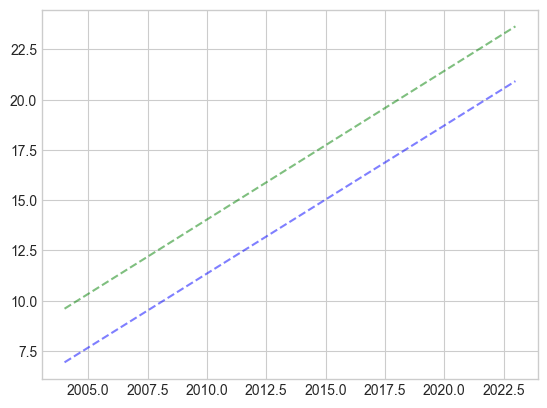

In [19]:
import numpy as np

# Germany trendline
germany_data = renew_share_filtered[renew_share_filtered["Region"] == "Germany"]
x_de = germany_data["Year"]
y_de = germany_data["Renewables Share (%)"]
z_de = np.polyfit(x_de, y_de, 1)
p_de = np.poly1d(z_de)
plt.plot(x_de, p_de(x_de), linestyle='--', color='blue', alpha=0.5, label='Germany Trend')

# EU trendline
eu_data = renew_share_filtered[renew_share_filtered["Region"] == "European Union - 27 countries (from 2020)"]
x_eu = eu_data["Year"]
y_eu = eu_data["Renewables Share (%)"]
z_eu = np.polyfit(x_eu, y_eu, 1)
p_eu = np.poly1d(z_eu)
plt.plot(x_eu, p_eu(x_eu), linestyle='--', color='green', alpha=0.5, label='EU Trend')


## 10. High-Level Summary Visualizations

### 10.1 Grouped Bar: % Change in Renewables vs Fossil (1990–2023)

**Insights:**
Germany showed an impressive +255% increase in total renewable energy consumption from 1990 to 2023. In comparison, fossil fuel usage in Germany dropped by -36% during the same time. The EU as a whole saw a +134% rise in renewables, and a –29% reduction in fossil fuel usage. This clearly highlights that Germany’s energy transition has outpaced the EU average, especially in:
- Renewables growth rate, which is nearly double the EU’s.
- Fossil fuel decline, where Germany achieved a sharper reduction.

These developments are consistent with long-term policy objectives such as the Energiewende, Kyoto, and Paris Agreements, showing Germany's leadership in clean energy adoption. 

The visual narrative here highlights Germany's substantial move away from fossil fuels, while several EU countries continue to rely heavily on legacy fuels.


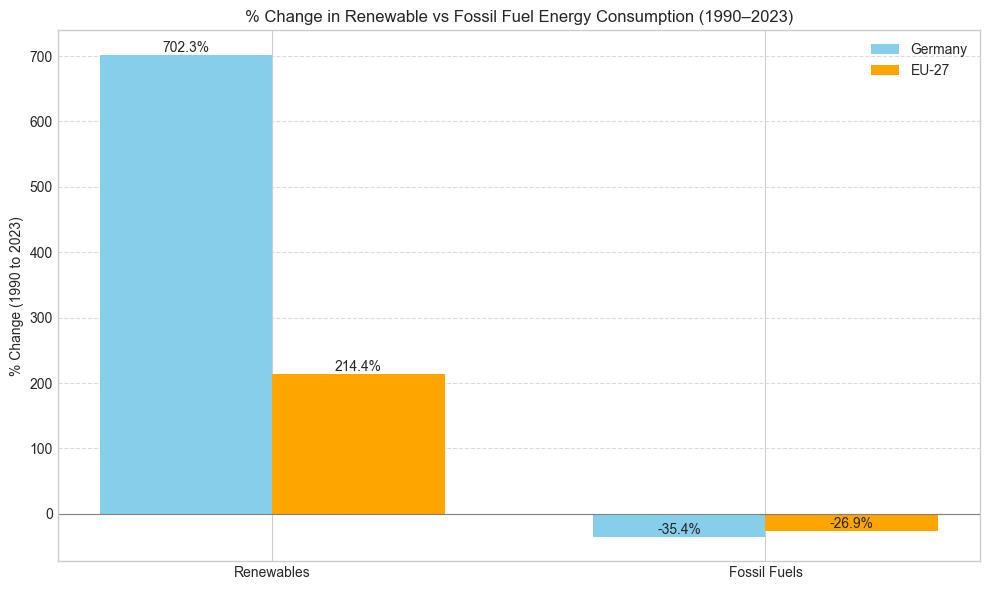

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# --- STEP 1: Recalculate Total Renewables and Fossils if not already present ---

# For Germany
germany_summary = germany_pivot.copy()
germany_summary["Total Renewables"] = (
    germany_summary["Bioenergy"] +
    germany_summary["Wind"] +
    germany_summary["Hydro"] +
    germany_summary["Solar thermal"] +
    germany_summary["Geothermal"]
)

germany_summary["Total Fossil"] = (
    germany_summary["Solid fossil fuels"] +
    germany_summary["Oil and petroleum products (excluding biofuel portion)"] +
    germany_summary["Natural gas"]
)

# For EU
eu_summary = eu_pivot.copy()
eu_summary["Total Renewables"] = (
    eu_summary["Bioenergy"] +
    eu_summary["Wind"] +
    eu_summary["Hydro"] +
    eu_summary["Solar thermal"] +
    eu_summary["Geothermal"]
)

eu_summary["Total Fossil"] = (
    eu_summary["Solid fossil fuels"] +
    eu_summary["Oil and petroleum products (excluding biofuel portion)"] +
    eu_summary["Natural gas"]
)

# --- STEP 2: Calculate % Change (1990 to 2023) ---

def get_percentage_change(df, col_name):
    initial = df[df["TIME_PERIOD"] == 1990][col_name].values[0]
    final = df[df["TIME_PERIOD"] == 2023][col_name].values[0]
    return ((final - initial) / initial) * 100

# Germany
ger_renew_change = get_percentage_change(germany_summary, "Total Renewables")
ger_fossil_change = get_percentage_change(germany_summary, "Total Fossil")

# EU
eu_renew_change = get_percentage_change(eu_summary, "Total Renewables")
eu_fossil_change = get_percentage_change(eu_summary, "Total Fossil")

# --- STEP 3: Plot Grouped Bar Chart ---

labels = ['Renewables', 'Fossil Fuels']
germany_values = [ger_renew_change, ger_fossil_change]
eu_values = [eu_renew_change, eu_fossil_change]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width/2, germany_values, width, label='Germany', color='skyblue')
bars2 = plt.bar(x + width/2, eu_values, width, label='EU-27', color='orange')

plt.ylabel('% Change (1990 to 2023)')
plt.title('% Change in Renewable vs Fossil Fuel Energy Consumption (1990–2023)')
plt.xticks(x, labels)
plt.axhline(0, color='gray', linewidth=0.8)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top
for bar in bars1 + bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

# Save & Show
plt.tight_layout()
plt.savefig("../visuals/germany_vs_eu_renew_fossil_change.png", dpi=300)
plt.show()


### 10.2 Final Energy Mix – Bar Chart (2023)

**Insights:**
In 2023, Germany's energy balance shifted considerably towards renewables, although it still maintained a considerable fossil fuel footprint.

**Fossil Fuels**
- Oil and petroleum products remained dominant in both Germany and the EU, although the EU's consumption (≈465,225 ktoe) was over 5 times larger than Germany's.
- Natural gas consumption in the EU was 272,603 ktoe, compared to 64,062 ktoe in Germany, a sharp disparity that presumably reflects Germany's hastened post-2022 transition following the Russia-Ukraine conflict.
- Solid fossil fuel use remained quite high in Germany (42,378 ktoe), greater than in certain other EU states, signalling potential phase-out delays in certain sectors.

**Renewables & Others**
- Bioenergy remains Germany's leading renewable energy source, while it still accounts for a small portion of total EU consumption.
- Wind and solar are stronger (relatively) in Germany than hydro, in contrast to many other EU countries, where hydro still plays a larger role.
- Nuclear heat has almost vanished in Germany (just 1,859 ktoe), compared to a significant 157,951 ktoe in the EU, clearly showing Germany’s nuclear phase-out completion.
- Geothermal and solar thermal/photovoltaic remain minor in both Germany and the EU, although Germany makes a significant contribution in solar.

**Key Note:**
Germany's 2023 energy mix is noticeably more decentralised and renewable-heavy, whilst the EU remains more reliant on traditional sources, mainly oil, gas, and nuclear. This snapshot strengthens the case for Germany as a transition leader, albeit with room for further bioenergy scaling and fossil reduction.

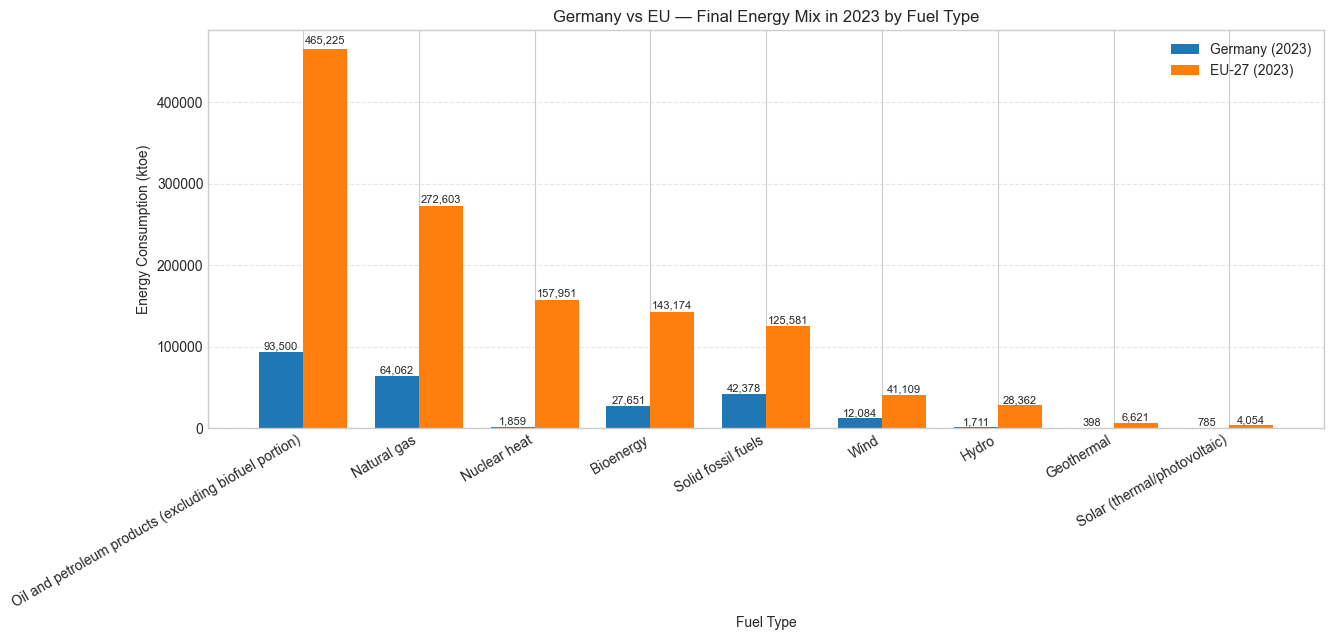

In [21]:
## 📊 Final Energy Mix in 2023 – Germany vs EU (Grouped Bar Chart)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

def pick_year_row(pivot, year=2023):
    if (pivot["TIME_PERIOD"] == year).any():
        return year, pivot[pivot["TIME_PERIOD"] == year]
    # fallback to last available year
    last = int(pivot["TIME_PERIOD"].max())
    return last, pivot[pivot["TIME_PERIOD"] == last]

# Flexible matching: try to find the best column name that contains any token
def find_col(candidates, cols):
    cols_lower = {c.lower(): c for c in cols}
    for cand in candidates:
        if cand in cols:  # exact
            return cand
        if cand.lower() in cols_lower:  # case-insensitive exact
            return cols_lower[cand.lower()]
    # contains match
    for c in cols:
        cl = c.lower()
        if any(tok in cl for tok in [x.lower() for x in candidates]):
            return c
    return None

# --- 2023 (or fallback) slice
yr_de, germany_yr = pick_year_row(germany_pivot, 2023)
yr_eu, eu_yr = pick_year_row(eu_pivot, 2023)

all_cols = [c for c in germany_pivot.columns if c != "TIME_PERIOD"]
# Define desired fuels (use flexible candidates for solar naming, etc.)
fuel_candidates = {
    "Solid fossil fuels": ["Solid fossil fuels","solid fossil","coal","lignite","hard coal"],
    "Oil and petroleum products (excluding biofuel portion)": ["Oil and petroleum products (excluding biofuel portion)","oil and petroleum","petroleum"],
    "Natural gas": ["Natural gas","gas"],
    "Nuclear heat": ["Nuclear heat","nuclear"],
    "Bioenergy": ["Bioenergy","bioenergy","primary solid biofuels","biogas","biofuel"],
    "Wind": ["Wind"],
    "Hydro": ["Hydro","hydroelectric"],
    "Solar (thermal/photovoltaic)": ["Solar thermal and photovoltaic","Solar thermal","Solar photovoltaic","Solar"],
    "Geothermal": ["Geothermal","ambient"]
}

resolved_cols = {}
for pretty, cands in fuel_candidates.items():
    col = find_col(cands, all_cols)
    if col is not None:
        resolved_cols[pretty] = col

# Build dataframe (drop fuels not found)
fuel_labels = list(resolved_cols.keys())
germany_values = germany_yr[[resolved_cols[f] for f in fuel_labels]].values.flatten().astype(float)
eu_values      = eu_yr[[resolved_cols[f] for f in fuel_labels]].values.flatten().astype(float)

energy_mix = pd.DataFrame({
    "Fuel Type": fuel_labels,
    f"Germany ({yr_de})": germany_values,
    f"EU-27 ({yr_eu})": eu_values
})

# Replace NaNs with 0 and sort by EU total (largest first) for readability
energy_mix = energy_mix.replace([np.inf, -np.inf], np.nan).fillna(0.0)
energy_mix = energy_mix.sort_values(by=f"EU-27 ({yr_eu})", ascending=False)

# Plot grouped bars
bar_width = 0.38
x = np.arange(len(energy_mix))
plt.figure(figsize=(13.5, 6.5))

g = plt.bar(x - bar_width/2, energy_mix[f"Germany ({yr_de})"], width=bar_width, label=f"Germany ({yr_de})")
e = plt.bar(x + bar_width/2, energy_mix[f"EU-27 ({yr_eu})"], width=bar_width, label=f"EU-27 ({yr_eu})")

plt.xlabel("Fuel Type")
plt.ylabel("Energy Consumption (ktoe)")
plt.title(f"Germany vs EU — Final Energy Mix in {yr_de if yr_de==yr_eu else f'{yr_de}/{yr_eu}'} by Fuel Type")
plt.xticks(x, energy_mix["Fuel Type"], rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()

# Value labels with thousands separators
def add_labels(bars):
    for b in bars:
        h = b.get_height()
        plt.text(b.get_x() + b.get_width()/2, h + max(50, h*0.01),
                 f"{int(round(h)):,}", ha='center', va='bottom', fontsize=8)

add_labels(g); add_labels(e)

plt.tight_layout()
os.makedirs("../visuals", exist_ok=True)
out_path = "../visuals/final_energy_mix_2023_by_fuel_grouped.png"
plt.savefig(out_path, dpi=300)
plt.show()


### 10.3 Pie Charts: Germany & EU 2023 Fuel Composition

**Insights**
These pie charts help to visualise the relative weight of each fuel type in Germany and the EU's total final energy consumption in 2023. They're great for quickly assessing proportional dominance, particularly how much of the energy mix is renewable vs fossil vs other (such as nuclear).

**Germany - 2023 Fuel Composition**

**Fossil Fuels (Natural Gas, Oil, Solid Fossils):**
- Make up the majority of Germany's mix, with oil being the largest single contributor.
- Despite strong policy action, natural gas and solid fossil fuels continue to hold a significant share.
- This demonstrates that the phase-out of fossil dependence is underway, but not yet complete.

**Renewables (Bioenergy, Wind, Hydro, Solar, Geothermal):**
- Together, they account for a sizable portion, with bioenergy and wind leading the way.
- Solar and hydro remain smaller slices, implying regional/geographic constraints.
- Overall, Germany's renewable share is substantially greater than the EU average, consistent with previous line charts.

**Nuclear:**
- Almost non-existent in Germany (post-2023 nuclear phase-out completed).
- Its absence is visibly obvious and contrasts with EU reliance.
<br>

**EU-27 – 2023 Fuel Composition**

**Fossil Fuels** 
- Oil dominates the EU market, accounting for the greatest segment.
- Natural gas and solid fossil fuels have a larger importance than in Germany, particularly in Eastern/Southern member states.

**Nuclear Heat:**
- Much larger share in the EU (unlike Germany).
- Highlights divergent national strategies, such as France and Slovakia, which continue to rely on nuclear as a clean baseline.

**Renewables:**
- While renewables are present, they account for a smaller share of the EU pie than Germany.
- Shows that, while the EU as a whole is striving for renewables, the pace varies by country.
<br>

**Narrative Summary:**
The 2023 fuel composition charts highlight Germany's deliberate shift away from nuclear energy and fossil fuel dominance, pointing to a more diverse and renewable-focused balance. 

In contrast, the EU-27’s energy landscape remains more reliant on traditional sources, particularly nuclear and fossil fuels, reflecting the varied energy policies and transition speeds across member states. While Germany leads in renewables, the EU's composition reflects both success and variability in its energy transformation journey.

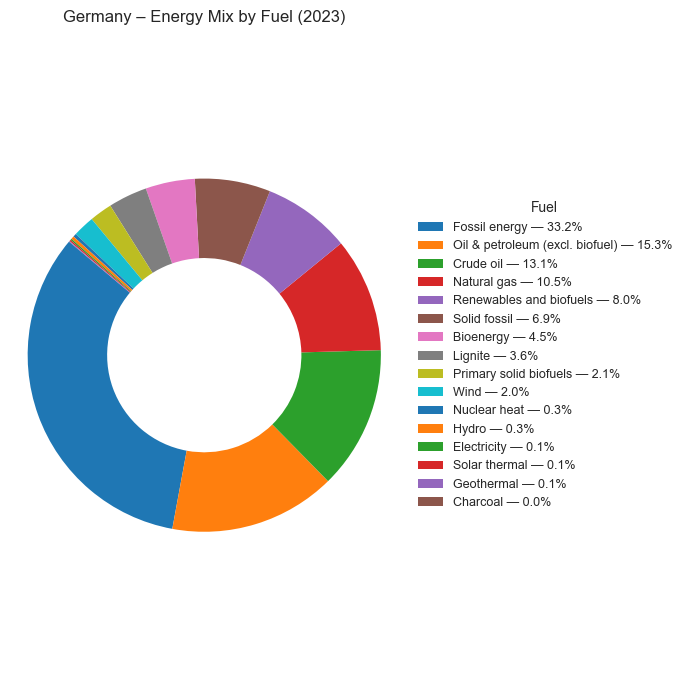

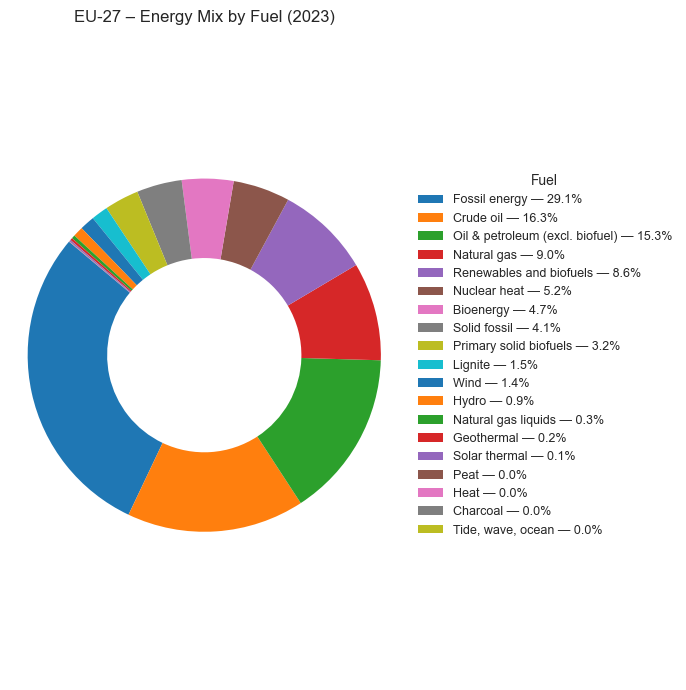

In [22]:
# Extract Germany's 2023 fuel mix
germany_fuel_mix = germany_pivot[germany_pivot["TIME_PERIOD"] == 2023].drop(columns="TIME_PERIOD").squeeze()

# Extract EU's 2023 fuel mix
eu_fuel_mix = eu_pivot[eu_pivot["TIME_PERIOD"] == 2023].drop(columns="TIME_PERIOD").squeeze()

def plot_pie_clean(series, title, out_path):
    # series: pandas Series (index = fuel labels, values = amounts)
    s = series.astype(float).replace([np.inf, -np.inf], np.nan).fillna(0.0)
    s = s[s > 0].sort_values(ascending=False)

    total = s.sum()
    pct = (s / total * 100).round(1)

    # Shorten long labels a bit for legend readability
    def shorten(lbl):
        return (lbl
                .replace("Oil and petroleum products (excluding biofuel portion)", "Oil & petroleum (excl. biofuel)")
                .replace("Solar thermal and photovoltaic", "Solar (thermal+PV)")
                .replace("Solid fossil fuels", "Solid fossil"))
    legend_labels = [f"{shorten(l)} — {p:.1f}%" for l, p in zip(s.index, pct)]

    fig = plt.figure(figsize=(7, 7))
    # Donut (creates white hole so pie looks lighter + clearer)
    wedges, _ = plt.pie(
        s.values,
        labels=None,                  # no labels on wedges → no overlap
        startangle=140,
        wedgeprops=dict(width=0.45),  # donut thickness
        normalize=True                # robust if rounding issues
    )

    # Legend outside
    plt.legend(wedges, legend_labels, title="Fuel",
               loc="center left", bbox_to_anchor=(1.02, 0.5), fontsize=9)

    plt.title(title)
    plt.axis("equal")
    plt.tight_layout()
    os.makedirs("../visuals", exist_ok=True)
    plt.savefig(out_path, dpi=300, bbox_inches="tight")
    plt.show()
# --- Use your existing series ---
plot_pie_clean(germany_fuel_mix, "Germany – Energy Mix by Fuel (2023)",
               "../visuals/germany_energy_pie_2023_clean.png")
plot_pie_clean(eu_fuel_mix, "EU-27 – Energy Mix by Fuel (2023)",
               "../visuals/eu_energy_pie_2023_clean.png")


## 11. Key Questions Answered (Markdown Cell)


This project provides data-driven answers to the following key questions about Germany and the EU's energy transition:

**Long-Term Trends & Transition**
- How has Germany’s energy consumption evolved from 1990 to 2023?
- How does Germany’s renewable adoption compare to the EU average over the same period?
- Which energy sources are declining, and which are rising across both regions?

**Fuel-Specific Comparisons**
- How do Germany and the EU differ in their use of Natural Gas, Oil, Solid Fossil Fuels, Nuclear, and Renewables?
- Is Germany truly leading in wind, solar, or bioenergy adoption compared to the EU average?
- What is the fuel composition of Germany vs EU in 2023?

**Impact of Global Events & Policies**
- Did key international agreements like the Kyoto Protocol (1997) and Paris Agreement (2015) affect renewable growth?
- What was the impact of Germany’s nuclear phase-out decision post-Fukushima?
- How did the 2022 Russia–Ukraine crisis affect fossil fuel dependence or renewables growth?

**Progress Metrics & Outcomes**
- Which region saw a higher % increase in renewable energy usage since 1990?
- Has Germany reduced fossil fuel dependency faster than the EU average?
- How does Germany’s 2023 energy mix reflect its transition goals compared to EU-27?

## 12. Limitations

Despite the depth and scope of this analysis, a few limitations are worth noting:

**Data Range Inconsistencies**
- While most datasets cover 1990–2023, the Renewables Share (%) dataset begins only from 2004, limiting direct long-term share-based comparisons.
- Some newer fuel types (e.g., solar thermal, geothermal) have sparse or low-resolution data before the 2000s.

**EU Averages Hide Regional Diversity**
- The EU-27 values represent an average across 27 countries, which may mask extreme variance between member states.
- Some nations (e.g., Sweden, France, Poland) have very different energy trajectories than the average.

**No Direct Emissions Data**
- This project focuses on consumption trends, not CO₂ emissions, carbon intensity, or climate impacts, which are equally vital for holistic sustainability assessments.

**Normalisation & Population Factors Not Considered**
- Data is shown in absolute ktoe units, which doesn’t account for population size, industrial base, or per capita consumption differences.

**Causality Cannot Be Proven**
- While we annotate major events (e.g., Paris Agreement, Ukraine Crisis), our analysis is correlational, not a definitive cause-and-effect study.

## 13. Conclusion

This study provided a detailed, data-driven analysis of energy consumption patterns in Germany and the European Union (EU) from 1990 to 2023, with a focus on the renewable energy transition.

Through fuel-wise comparisons, share-of-renewables analysis, and policy impact overlays, we discovered that:

- Germany has achieved a considerable transition to renewable energy, lowering its reliance on nuclear and solid fossil fuels.
- The EU's energy mix remains more diverse, reflecting different national plans, but the region has also made steady progress toward its renewable ambitions.
- Critical events, such as the Kyoto Protocol (1997), the Paris Agreement (2015), Germany's nuclear phase-out (2011-2023), and the Russia-Ukraine Energy Crisis (2022), have played significant roles in defining the region's energy destiny.

From high-level summary charts to individual fuel trends, this project illustrated the energy transition while also emphasising how policy, geopolitics, and national pledges influence long-term sustainability goals.